In [33]:
y_train

array([2.68988372, 2.6895189 , 2.69020173, 2.56886253, 2.2242357 ,
       2.05740269, 1.96215889, 1.90338715, 2.01850438, 2.1510941 ])

In [34]:
tmvsk[:,4]

array([2.68988372, 2.6895189 , 2.69020173, 2.56886253, 2.2242357 ,
       1.95426363, 2.05740269, 1.96215889, 1.90338715, 2.01850438,
       2.1510941 ])

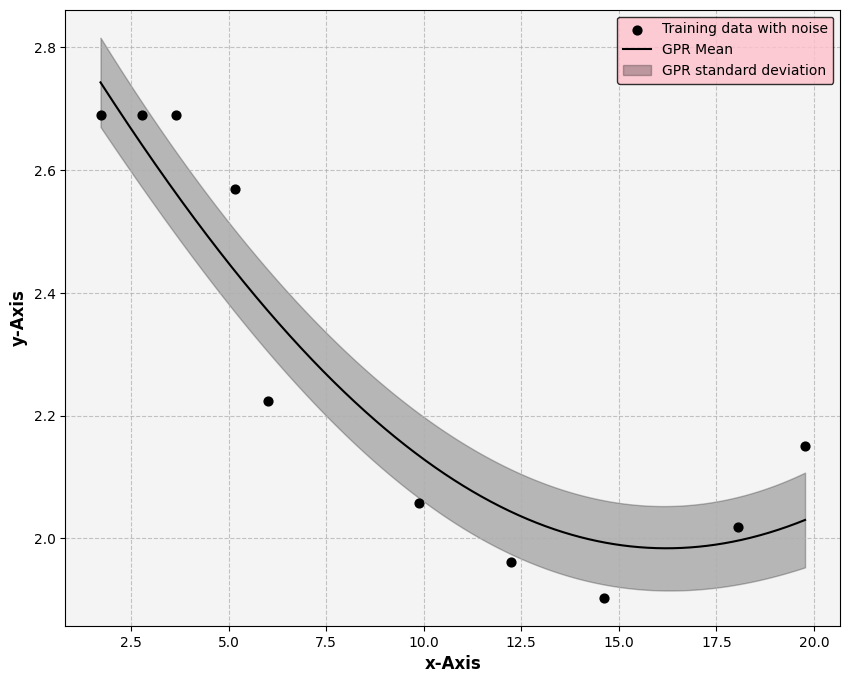

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

input_file = "/Users/Jayee/OneDrive - UW-Madison/PhD(Data)/shear_data/Von_mises_data/vm_701/moments_data/t_mvskm5m6_701.npy"
tmvsk = np.load(input_file)

x_train = tmvsk[:,0]
y_train = tmvsk[:,4]

x_train = np.delete(x_train,5)
y_train = np.delete(y_train,5)

# # Defining my function
# def my_func(x):
#     c=1
#     y =  x**2 + 10*np.sin(4*x) +50*np.cos(0.25*x)
#     #y = x*np.sin(x)+c
#     return y

# Lets define a function to plot kernels, mean, standard deviation from the GPR
def plot_func(GPRmodel,x_train):
    n_samples = 5
    x_plot_gpr = np.linspace(min(x_train), max(x_train), 1000)
    x_plot_gpr_scaled = scaler.transform(x_plot_gpr.reshape(-1,1))
    y_plot_gpr = GPRmodel.sample_y(x_plot_gpr_scaled,n_samples)
    y_mean,y_std = GPRmodel.predict(x_plot_gpr_scaled,return_std=True)
    
    ## plotting
    fig, axs = plt.subplots(1,1,figsize=(10,8))
    axs.set_title("")
    axs.set_xlabel("x-Axis", fontweight="bold", fontsize=12)
    axs.set_ylabel("y-Axis", fontweight="bold", fontsize=12)
    
    axs.scatter(x_train, y_train, c="black",s=40, label = "Training data with noise")
    #axs.plot(x_plot, y_plot, "k--", label= "actual function")
    #axs.plot(x_plot_gpr,y_plot_gpr, alpha = 0.25)
    axs.plot(x_plot_gpr,y_mean,"k-",label="GPR Mean")
    axs.fill_between(x_plot_gpr, 
                     y_mean+1.96*y_std,
                     y_mean-1.96*y_std, 
                     color = "black",
                    alpha = 0.25, label = "GPR standard deviation")
    
    axs.grid("on", alpha=0.75, linestyle="--")
    axs.set_facecolor("#f4f4f4")
    axs.legend(loc="best", facecolor="pink", edgecolor="black")
    return fig
    
#number of training data 
n_train = 10

# defining noise
np.random.seed(2)
epsilon = 0

# # Defining the training data
# x_train = np.linspace(0,10,n_train)
# y_train = my_func(x_train) + epsilon

# # Defining the data to plot
# x_plot = np.linspace(0,10,1000)
# y_plot = my_func(x_plot)

# scaling the data 
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1,1))
x_train_scaled = scaler.transform(x_train.reshape(-1,1))

# Defining Kernel function
kernel = RBF(length_scale = 2, length_scale_bounds=[1e-2,1e2] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-2,1e2])

# # Defining GPR untrained model
# gpr_model_untrained = GPR(kernel=kernel, n_restarts_optimizer=10, optimizer=None, random_state=0)
# plot_func(gpr_model_untrained,x_train)
# #GPR model untrained no noise


# Defining GPR trained model
gpr_model_trained = GPR(kernel=kernel, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained.fit(x_train_scaled,y_train)
ls_2_gpr_fig = plot_func(gpr_model_trained,x_train)
# Plotting the training data along with the actual function


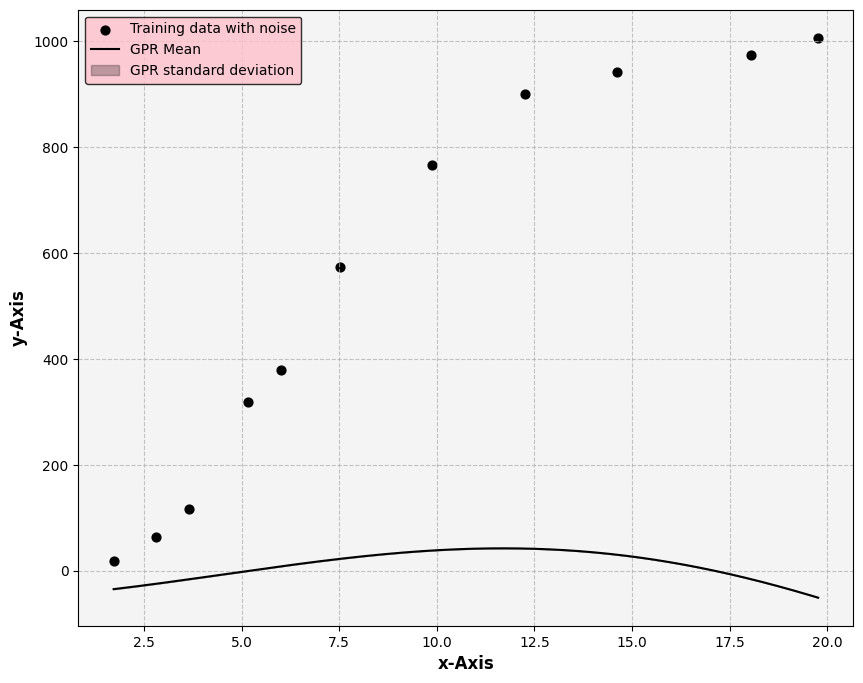

In [104]:
y_train_2 = y_train - gpr_model_trained.predict(x_train_scaled)
# Defining GPR trained model
kernel_2 = RBF(length_scale = 1, length_scale_bounds=[1e-2,1e2] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-2,1e2])
gpr_model_trained_2 = GPR(kernel=kernel_2, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_2.fit(x_train_scaled,y_train_2)
ls_1_gpr_fig=plot_func(gpr_model_trained_2,x_train)

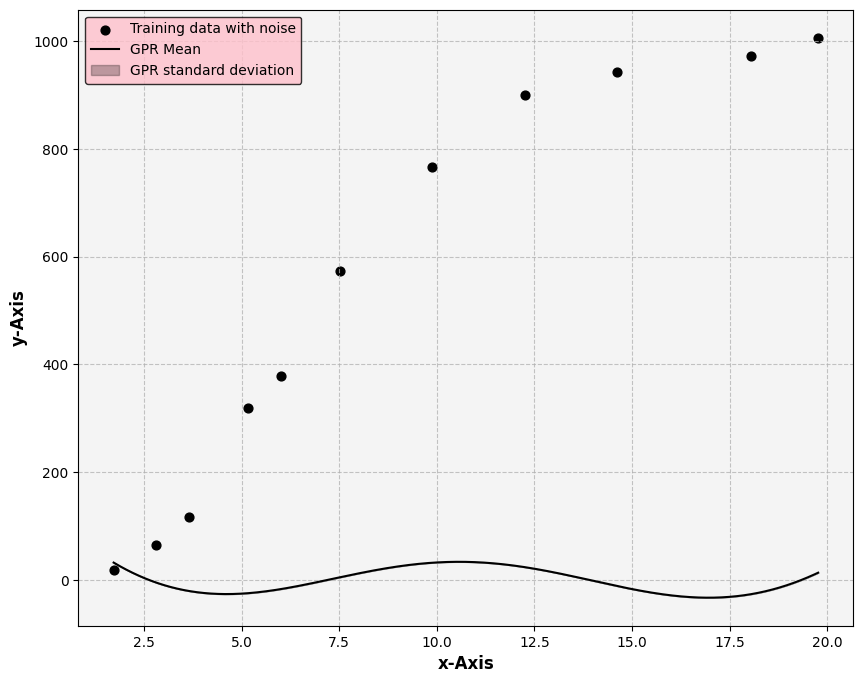

In [105]:
y_train_3 = y_train_2 - gpr_model_trained_2.predict(x_train_scaled)
# Defining GPR trained model
kernel_3 = RBF(length_scale = 0.5, length_scale_bounds=[1e-3,1e3] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-3,1e3])
gpr_model_trained_3 = GPR(kernel=kernel_3, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_3.fit(x_train_scaled,y_train_3)
ls_5e1_gpr_fig=plot_func(gpr_model_trained_3,x_train)

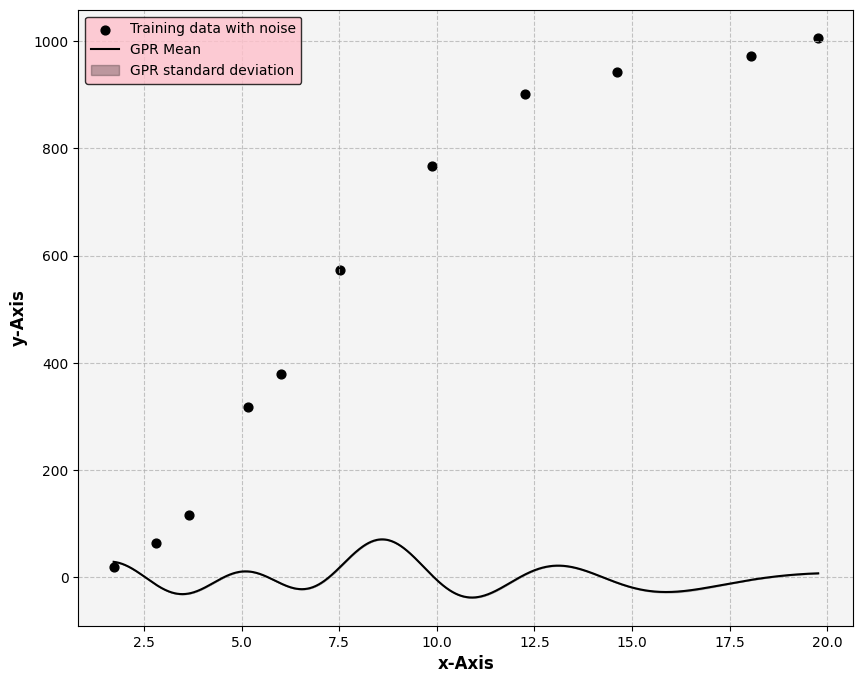

In [106]:
y_train_4 = y_train_3 - gpr_model_trained_3.predict(x_train_scaled)
# Defining GPR trained model
kernel_4 = RBF(length_scale = 0.1, length_scale_bounds=[1e-4,1e4] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-4,1e4])
gpr_model_trained_4 = GPR(kernel=kernel_4, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_4.fit(x_train_scaled,y_train_4)
ls_1e1_gpr_fig=plot_func(gpr_model_trained_4,x_train)

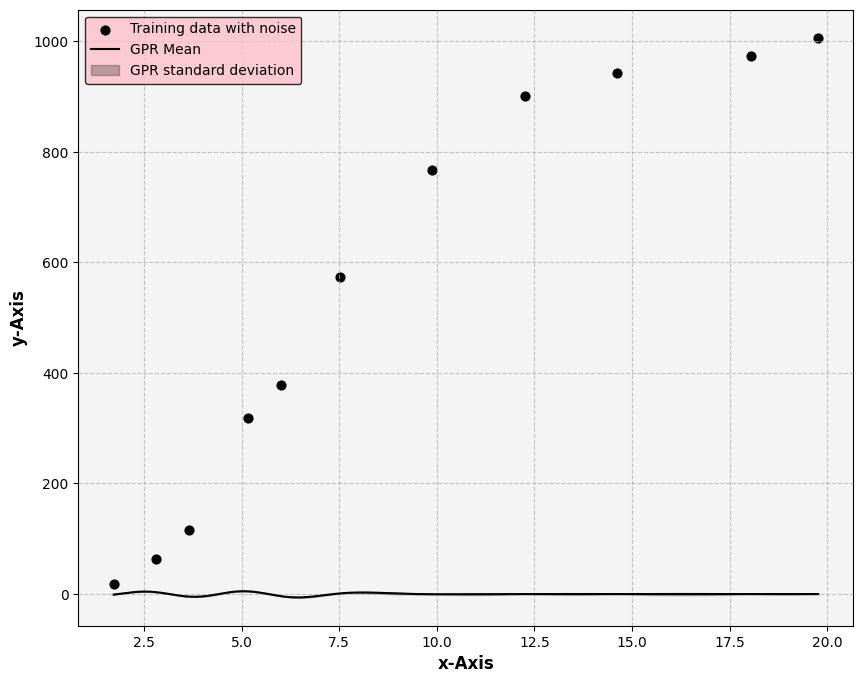

In [107]:
y_train_5 = y_train_4 - gpr_model_trained_4.predict(x_train_scaled)
# Defining GPR trained model
kernel_5 = RBF(length_scale = 0.05, length_scale_bounds=[1e-5,1e5] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-5,1e5])
gpr_model_trained_5 = GPR(kernel=kernel_5, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_5.fit(x_train_scaled,y_train_5)
ls_5e2_gpr_fig=plot_func(gpr_model_trained_5,x_train)

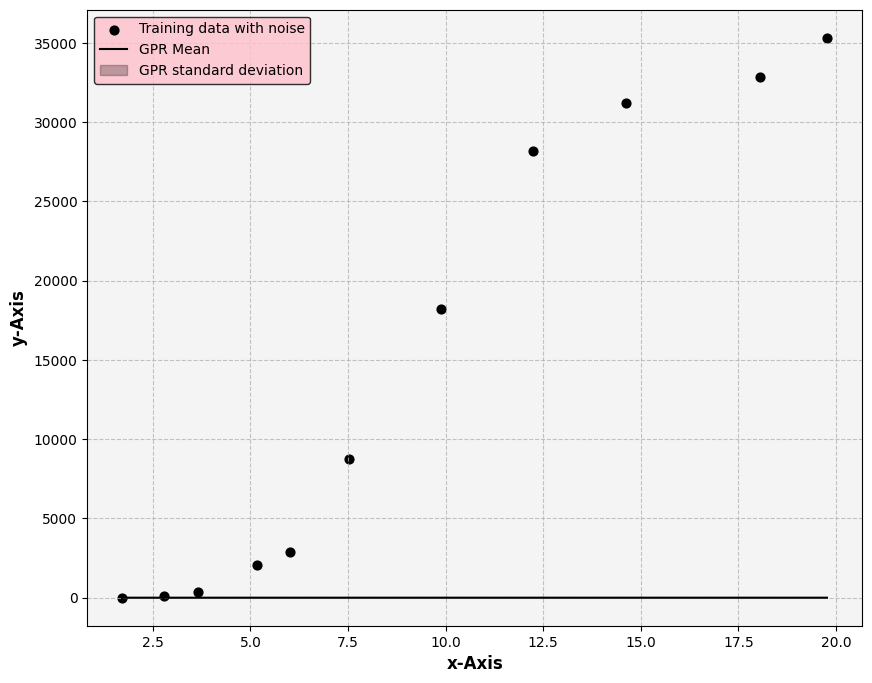

In [92]:
y_train_6 = y_train_5 - gpr_model_trained_5.predict(x_train_scaled)
# Defining GPR trained model
kernel_6 = RBF(length_scale = 0.01, length_scale_bounds=[1e-6,1e6] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-6,1e6])
gpr_model_trained_6 = GPR(kernel=kernel_6, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_6.fit(x_train_scaled,y_train_6)
ls_1e2_gpr_fig=plot_func(gpr_model_trained_6,x_train)

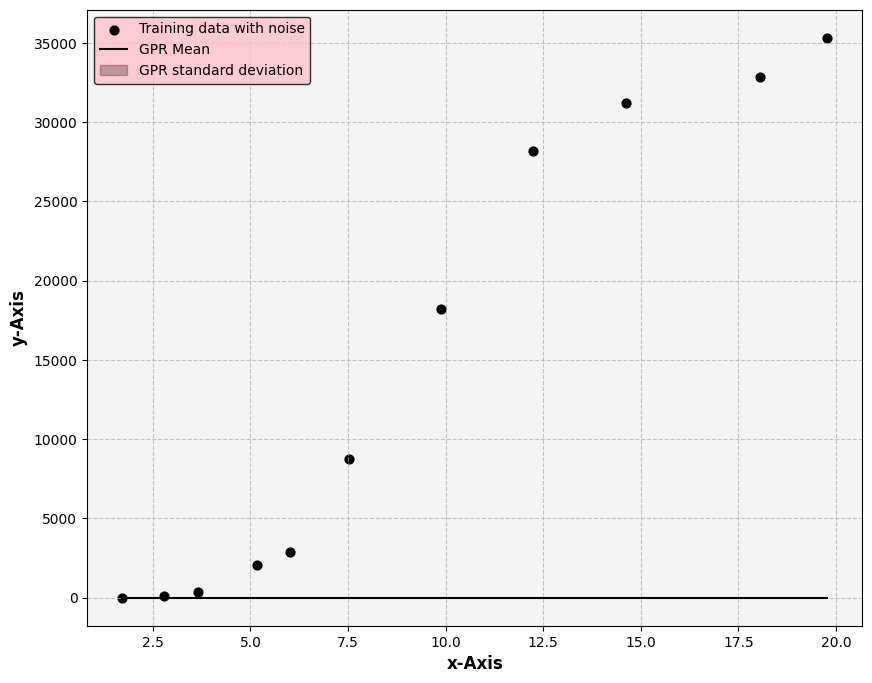

In [93]:
y_train_7 = y_train_6 - gpr_model_trained_6.predict(x_train_scaled)
# Defining GPR trained model
kernel_7 = RBF(length_scale = 0.005, length_scale_bounds=[1e-7,1e7] ) + WhiteKernel(noise_level=1e-3, noise_level_bounds=[1e-7,1e7])
gpr_model_trained_7 = GPR(kernel=kernel_7, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained_7.fit(x_train_scaled,y_train_7)
ls_5e3_gpr_fig=plot_func(gpr_model_trained_7,x_train)

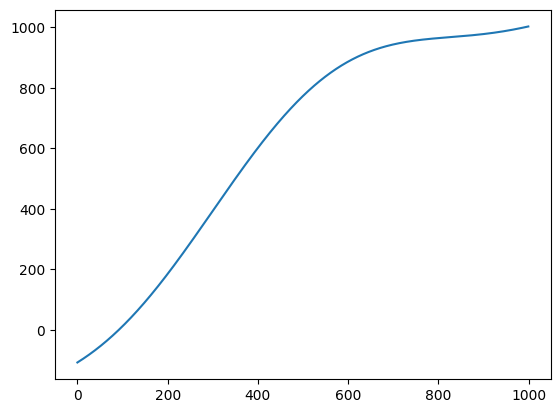

In [94]:
plt.plot(crazy)

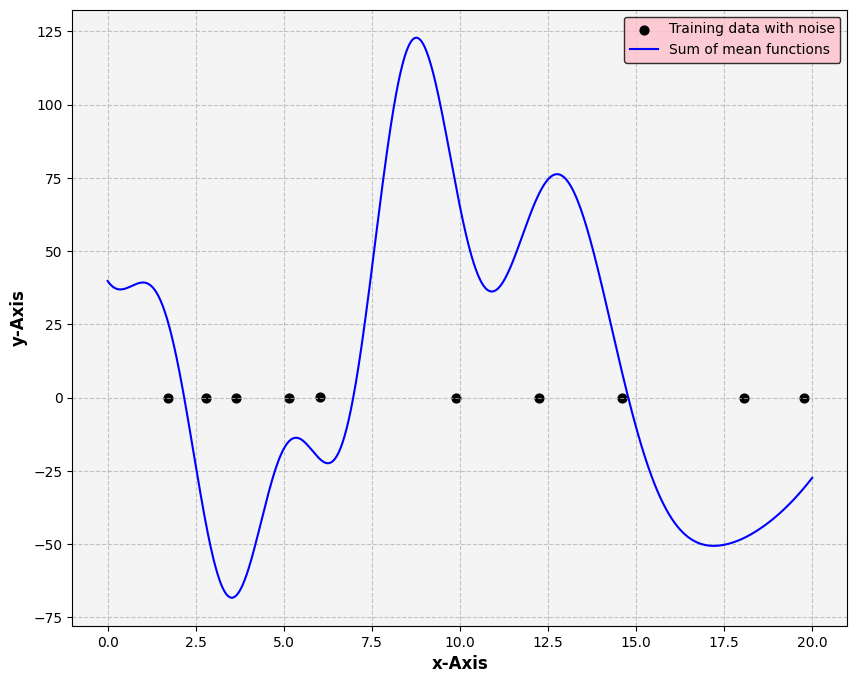

In [120]:
## plotting
fig, axs = plt.subplots(1,1,figsize=(10,8))
axs.set_title("")
axs.set_xlabel("x-Axis", fontweight="bold", fontsize=12)
axs.set_ylabel("y-Axis", fontweight="bold", fontsize=12)

x_plot= np.linspace(0,20,1000)
x_plot_scaled = scaler.transform(x_plot.reshape(-1,1))
crazy = (gpr_model_trained.predict(x_plot_scaled)
         + gpr_model_trained_2.predict(x_plot_scaled)
         + gpr_model_trained_3.predict(x_plot_scaled)
         + gpr_model_trained_4.predict(x_plot_scaled)
        # + gpr_model_trained_5.predict(x_plot_scaled)
         #+ gpr_model_trained_6.predict(x_plot_scaled)
        )
axs.scatter(x_train, y_train, c="black",s=40, label = "Training data with noise")
axs.plot(x_plot,crazy,"b-", label="Sum of mean functions")
#axs.plot(x_plot,y_plot,"k--", label="Actual Function" )

axs.grid("on", alpha=0.75, linestyle="--")
axs.set_facecolor("#f4f4f4")
axs.legend(loc="best", facecolor="pink", edgecolor="black")


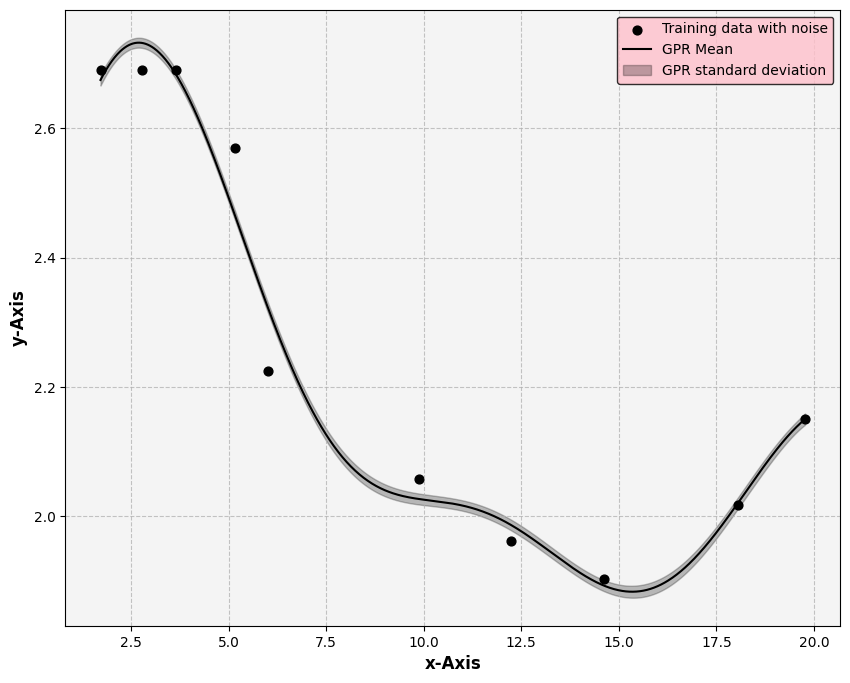

In [155]:
Kernel_combined = (RBF(length_scale = 2, length_scale_bounds=[1e-2,1e2])
                   + RBF(length_scale = 1, length_scale_bounds=[1e-2,1e2])
                   + RBF(length_scale = 0.5, length_scale_bounds=[1e-2,1e2])
                   + RBF(length_scale = 0.35, length_scale_bounds=[1e-2,1e2])
                   #+ RBF(length_scale = 0.2, length_scale_bounds=[1e-2,1e2])
                   #+ RBF(length_scale = 0.1, length_scale_bounds=[1e-2,1e2])
                   #+ RBF(length_scale = 0.05, length_scale_bounds=[1e-2,1e2])
                   #+ RBF(length_scale = 0.01, length_scale_bounds=[1e-2,1e2])
                   + WhiteKernel(noise_level=1e-5, noise_level_bounds=[1e-2,1e2]))

# Defining GPR trained model
gpr_model_trained = GPR(kernel=Kernel_combined, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained.fit(x_train_scaled,y_train)
ls_comb_gpr_fig=plot_func(gpr_model_trained,x_train)